In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [102]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(134, 167)
134 167 22378


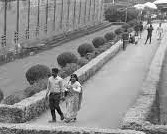

In [109]:
I = cv2.imread('/content/drive/Othercomputers/My Laptop (1)/MCA/3 rd SEM/MCA T35 E-II Computer Vision _Satyabrata Maity/Image Processing/adina.jpg',0)
#cv2_imshow(I)
print(I.shape)
r = I.shape[0]
c = I.shape[1]
print(r,c,r*c)
cv2_imshow(I)

Histogram of before equalization.

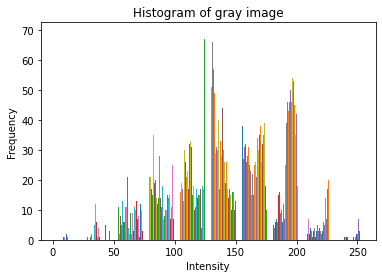

In [104]:
hist = cv2.calcHist([I],[0],None,[256],[0,256])
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of gray image")
plt.hist(I)
plt.show()

Calculation of equalize histogram.[sheet](https://docs.google.com/spreadsheets/d/1Qan7qsxlxK0dU6uCvkvCFvX8OoDSs3RjRvn0xcHoGDM/edit?usp=sharing)

In [110]:
pdf = np.zeros((len(hist)))
for i in range(len(hist)):
  pdf[i] = (hist[i][0])/(r*c)
#print(pdf)
cdf = np.zeros((len(hist)))
cdf[0] = pdf[0]
for i in range(1,len(hist)):
  cdf[i] = cdf[i-1] + pdf[i]
#print(cdf)
Lcdf = np.zeros((len(hist)))
for i in range(len(hist)):
  Lcdf[i] = (len(hist)-1)*cdf[i]
#print(Lcdf)
for i in range(len(hist)):
  Lcdf[i] =int(round(Lcdf[i],0))
Ieq = np.zeros(I.shape)
for i in range(r):
  for j in range(c):
    Ieq[i][j] = Lcdf[I[i][j]]


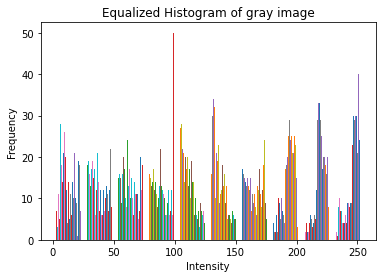

In [111]:
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Equalized Histogram of gray image")
plt.hist(Ieq)
plt.show()

Before equalization


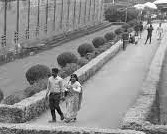

After equalization


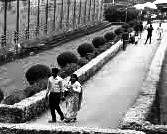

In [113]:
print("Before equalization")
cv2_imshow(I)
print("After equalization")
cv2_imshow(Ieq)